Train - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       117
           1       0.99      0.98      0.99       123

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

Test - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.93      0.96      0.94        26

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



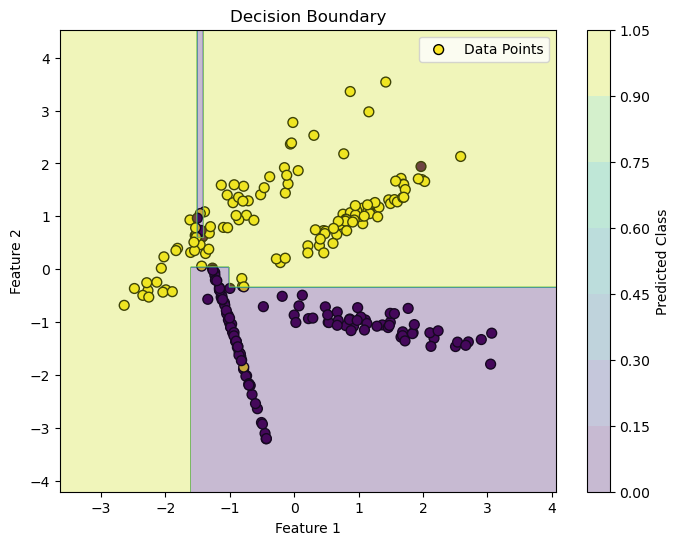

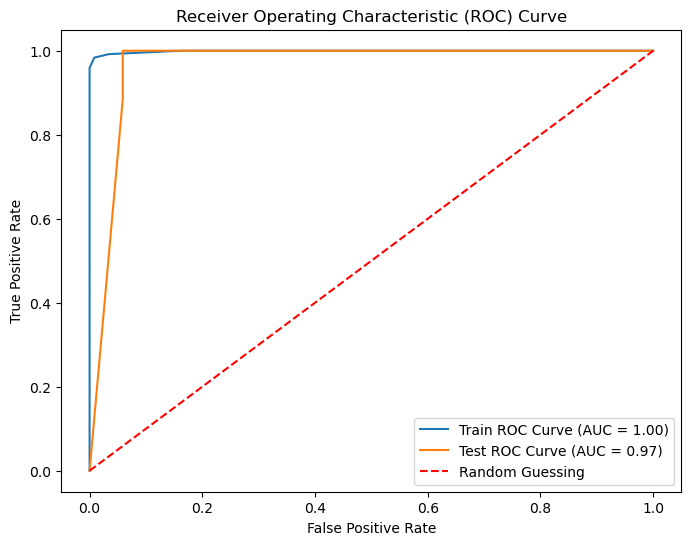

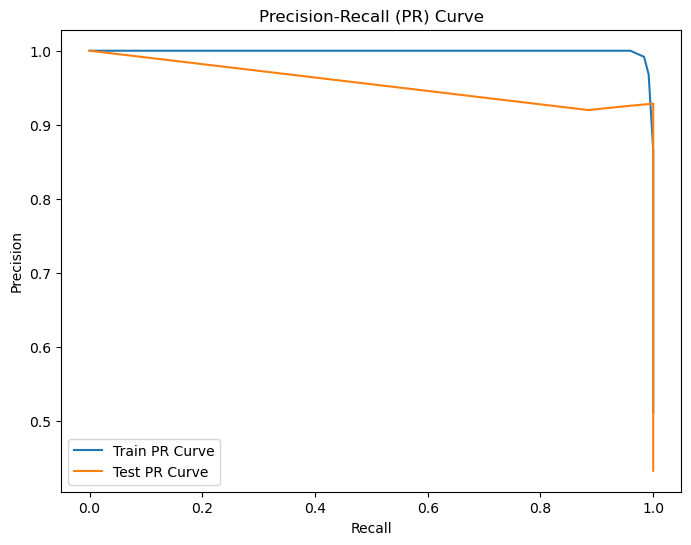

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
import pandas as pd

# Generate synthetic dataset as mentioned in the assignment
np.random.seed(0)
X, Y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# for plot decision boundaries  and save the plot
def plot_decision_boundary(model, X, y, save_path=None):
    plt.figure(figsize=(8, 6))
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, label='Data Points')
    
    # Plot decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.colorbar(label='Predicted Class')
    plt.legend()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Save plot as JPG/PDF
        
    plt.show()

# 1. Construct Decision Tree model
dt = DecisionTreeClassifier()

# 2. Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 25],
    'min_samples_split': [2, 5, 20],
    'min_samples_leaf': [1, 5, 5],
    'max_leaf_nodes': [None, 10, 10],
    'max_features': [None, 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 3. Evaluate model
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 4. Compute evaluation metrics
print("Train - Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Test - Classification Report:")
print(classification_report(y_test, y_pred_test))

# 5. Plot decision boundaries  and save the plot
plot_decision_boundary(best_model, X_train, y_train, save_path='decision_boundary_plot.jpg')

# 6. Analyze results, compare models, and draw conclusions
#  ROC curve and AUC
y_prob_train = best_model.predict_proba(X_train)[:, 1]
y_prob_test = best_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Save ROC curve plot as JPG and PDF
plt.savefig('roc_curve_plot.jpg', dpi=300, bbox_inches='tight')
plt.savefig('roc_curve_plot.pdf', bbox_inches='tight')

plt.show()

# PR curve and F1-score
precision_train, recall_train, _ = precision_recall_curve(y_train, y_prob_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, label='Train PR Curve')
plt.plot(recall_test, precision_test, label='Test PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend()
plt.savefig('recall_curve_plot.jpg', dpi=300, bbox_inches='tight')
plt.savefig('recall_curve_plot.pdf', bbox_inches='tight')


plt.show()
